In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [426]:
data = pd.read_excel('/Users/manasmaurya/Downloads/Data_Train.xlsx')
print(data.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [427]:
org = pd.read_excel('/Users/manasmaurya/Downloads/Data_Train.xlsx')

In [428]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [429]:
data.drop('Name', axis = 1, inplace = True)

In [430]:
locations = data.Location.unique()
num = list(np.arange(data.Location.nunique()))
data['Location'] = data['Location'].map({location : n for location,n in zip(locations,num)})
yr = data.Year.unique()
num = np.arange(data.Year.nunique())
data['Year'] = data['Year'].map({y : n for y,n in zip(yr,num)})
fuel = data.Fuel_Type.unique()
num = np.arange(data.Fuel_Type.nunique())
data['Fuel_Type'] = data['Fuel_Type'].map({f : n for f,n in zip(fuel,num)})
transm = data.Transmission.unique()
num = np.arange(data.Transmission.nunique())
data['Transmission'] = data['Transmission'].map({t : n for t,n in zip(transm,num)})
own = data.Owner_Type.unique()
num = np.arange(data.Owner_Type.nunique())
data['Owner_Type'] =  data['Owner_Type'].map({o : n for o,n in zip(own,num)})


In [431]:
(data.head())

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,72000,0,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,1,41000,1,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,2,46000,2,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2,3,87000,1,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,3,4,40670,1,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [432]:
print(data.loc[(data.Fuel_Type == 0) | (data.Fuel_Type == 3) ].Mileage.dropna().min())
print(data.loc[(data.Fuel_Type == 0) | (data.Fuel_Type == 3) ].Mileage.dropna().max())
print(data.loc[(data.Fuel_Type != 0) & (data.Fuel_Type != 3) ].Mileage.dropna().min())
print(data.loc[(data.Fuel_Type != 0) & (data.Fuel_Type != 3) ].Mileage.dropna().max())

13.2 km/kg
33.54 km/kg
0.0 kmpl
9.9 kmpl


In [433]:
gas = data.loc[(data.Fuel_Type != 0) & (data.Fuel_Type != 3) ].Mileage
ngas = data.loc[(data.Fuel_Type == 0) | (data.Fuel_Type == 3) ].Mileage
gas = gas.fillna('0 kmpl')
data['Mileage'] = data.Mileage.fillna('0 kmpl')
data['Engine'] = data.Engine.fillna('0 CC')
data['Power'] = data.Power.fillna('0 bhp')
data['Seats'] = data.Seats.fillna(1.0)

In [434]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

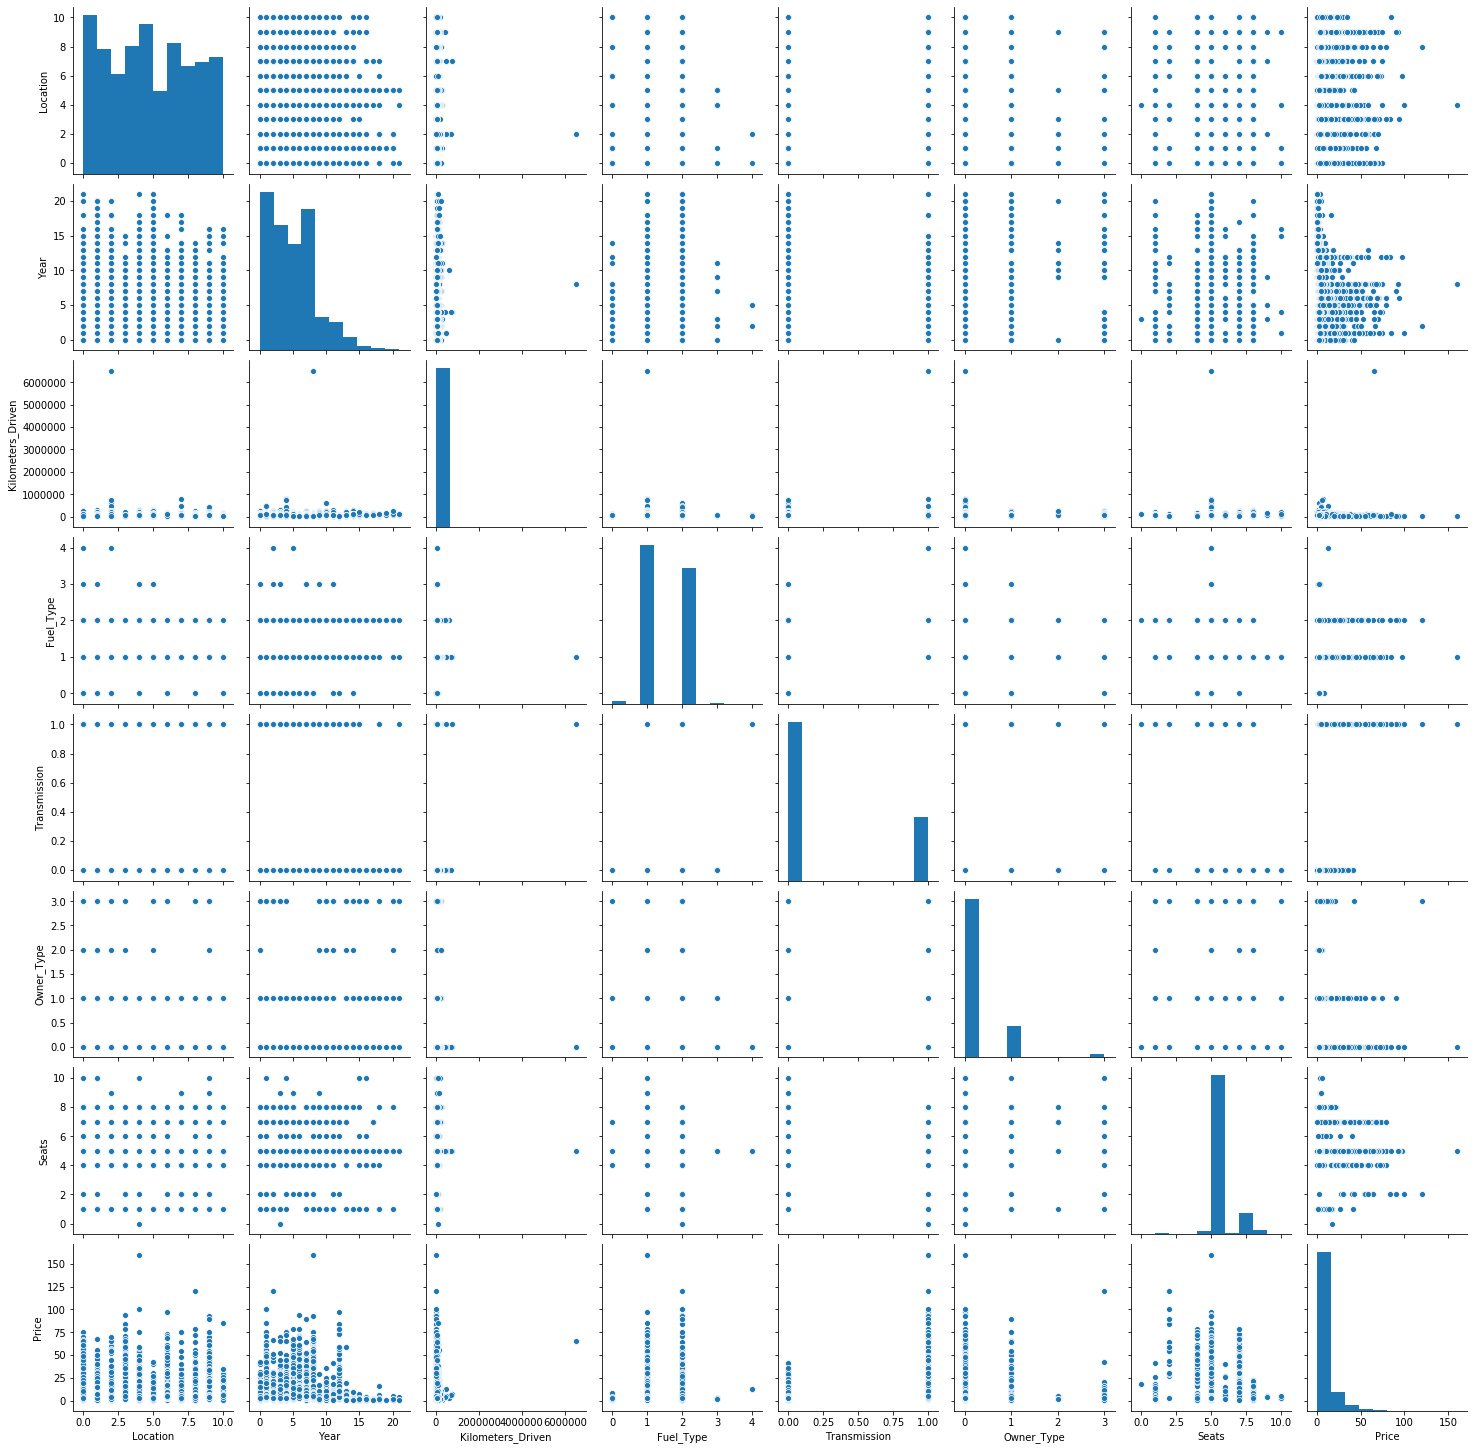

In [435]:
sns.pairplot(data)

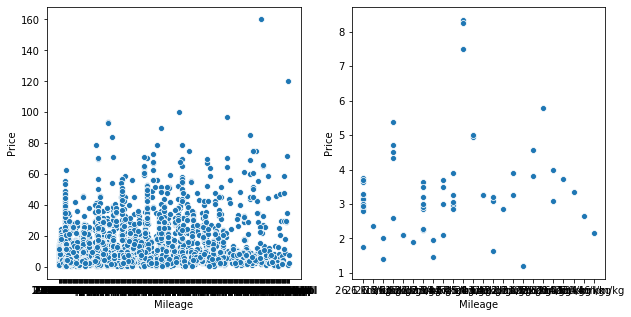

In [436]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(gas,data.Price) #petrol diesel
plt.subplot(1,2,2)
sns.scatterplot(ngas,data.Price) #cng lpg
plt.show()

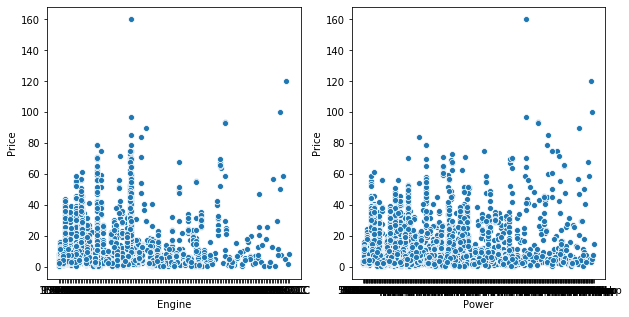

In [437]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Engine,data.Price)
plt.subplot(1,2,2)
sns.scatterplot(data.Power,data.Price) #cng lpg
plt.show()

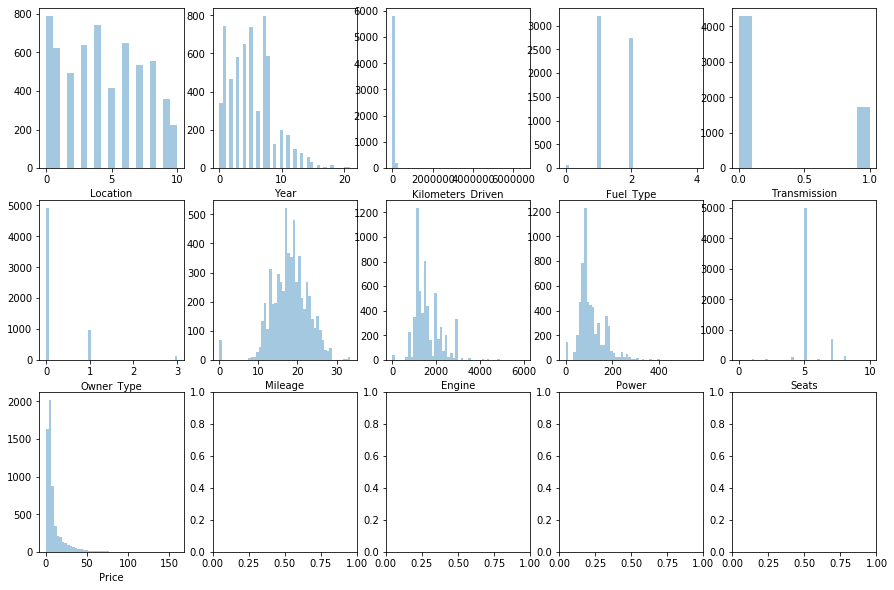

In [438]:

fig, ax = plt.subplots(3,5, figsize = (15,10))
col = data.columns

fix=data.Power.str.replace('bhp','')
fix.loc[fix == 'null '] = 0
fix = fix.astype('float')

data['Mileage'] = data.Mileage.str.replace('kmpl','')
data['Mileage'] = data.Mileage.str.replace('km/kg','').astype('float')
data['Power'] = fix
data['Engine'] = data.Engine.str.replace('CC','').astype('float')
i = 0

for m in range(3):
    for n in range(5):
        sns.distplot(data[col[i]], ax = ax[m][n], kde = False)
        i += 1
        if i == 11:
            break
        
# getting a better idea about choosing features by looking at distribution

In [439]:
corr_matx = data.corr()
corr_matx

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Location,1.000000,-0.052203,-0.029288,-0.057276,-0.031249,-0.072897,0.045962,0.004521,0.014801,-0.001937,0.020010
Year,-0.052203,1.000000,0.016725,0.086658,-0.004423,0.157145,-0.121006,-0.027024,-0.068464,-0.009259,-0.012938
Kilometers_Driven,-0.029288,0.016725,1.000000,-0.098833,-0.025663,0.081791,-0.064915,0.087549,0.022738,0.072391,-0.011493
Fuel_Type,-0.057276,0.086658,-0.098833,1.000000,-0.113006,0.045866,-0.170188,-0.383526,-0.252976,-0.281128,-0.289585
Transmission,-0.031249,-0.004423,-0.025663,-0.113006,1.000000,-0.011413,-0.334307,0.490800,0.626233,-0.063468,0.586025
Owner_Type,-0.072897,0.157145,0.081791,0.045866,-0.011413,1.000000,-0.154041,0.036330,-0.010148,-0.009767,-0.095508
Mileage,0.045962,-0.121006,-0.064915,-0.170188,-0.334307,-0.154041,1.000000,-0.549938,-0.419891,-0.229486,-0.306191
Engine,0.004521,-0.027024,0.087549,-0.383526,0.490800,0.036330,-0.549938,1.000000,0.844788,0.429117,0.647232
Power,0.014801,-0.068464,0.022738,-0.252976,0.626233,-0.010148,-0.419891,0.844788,1.000000,0.162230,0.751724
Seats,-0.001937,-0.009259,0.072391,-0.281128,-0.063468,-0.009767,-0.229486,0.429117,0.162230,1.000000,0.057717


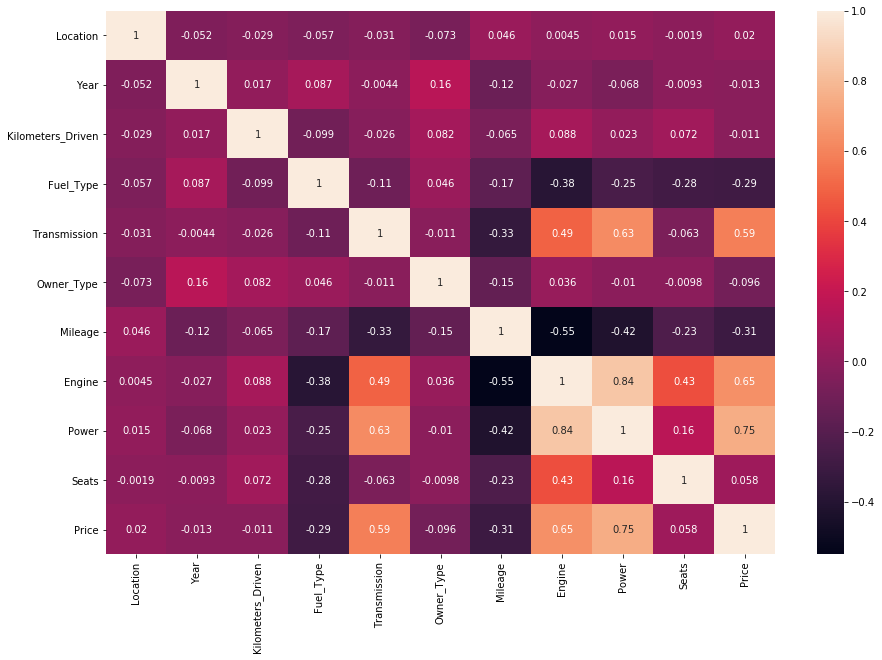

In [440]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_matx,annot=True)

# MODEL 1 

* didn't remove the outliers 
* mileage for natural gas and gas weren't separated into two different columns(or dataframe)

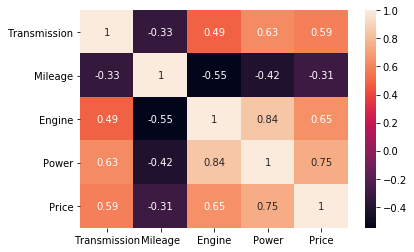

In [441]:
#selected on the basis of correlation matrix
formodel = data[['Transmission','Mileage','Engine','Power','Price']]
sns.heatmap(formodel.corr(), annot = True)

In [442]:
formodel.drop('Mileage',axis = 1, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [443]:
formodel.describe()

,Transmission,Engine,Power,Price
count,6019.000000,6019.000000,6019.000000,6019.000000
mean,0.285762,1611.579498,110.562372,9.479468
std,0.451814,612.449869,55.956041,11.187917
min,0.000000,0.000000,0.000000,0.440000
25%,0.000000,1197.000000,74.000000,3.500000
50%,0.000000,1493.000000,91.100000,5.640000
75%,1.000000,1969.000000,138.030000,9.950000
max,1.000000,5998.000000,560.000000,160.000000


In [444]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(formodel[['Engine','Power']])
df_std = std_scale.transform(formodel[['Engine','Power']])
copy = formodel
# df = pd.DataFrame({'Engine' :[] ,'Power' : [] })
# l = formodel.shape[0]
# for i,j in df_std :
#     df['Engine'].iloc[-l] = i
#     df['Power'].iloc[-l] = j
#     l-=1

In [445]:
for i, j in df_std:
    print(i)
    print(j)
    break

-1.0019276771968366
-0.9365695864138397


In [446]:
copy = formodel
l = formodel.shape[0]
k = 0
for i,j in df_std :
    copy['Engine'].iloc[k] = i
    copy['Power'].iloc[k] = j
    k+=1
    if k == l :
        break

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [447]:
copy

,Transmission,Engine,Power,Price
0,0,-1.001928,-0.936570,1.75
1,0,-0.048301,0.279486,12.50
2,0,-0.673710,-0.390739,4.50
3,0,-0.593697,-0.389666,6.00
4,1,0.582007,0.540427,17.74
...,...,...,...,...
6014,0,-0.593697,-0.653467,4.75
6015,0,-0.802711,-0.707085,4.00
6016,0,1.447456,0.025694,2.90
6017,0,-1.001928,-0.776788,2.65


In [448]:
X = copy[['Engine', 'Power','Transmission']]
y = copy[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

In [449]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [450]:
y_predict = model.predict(X_test)
y_test = np.array(y_test)

In [451]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print(score)
print(mse)

0.6082760668955773
46.95946376036265


# Two models are created below, one for natural gas driven vehicles and one for normal gas

* outliers not removed again 

>> both models have lower r squared score than the previous model

In [452]:
#org is original dataset
org = org[['Transmission','Mileage','Engine','Power','Price','Fuel_Type']]
org.Transmission = org.Transmission.map({'Manual' : 0,'Automatic' : 1})


In [453]:
print(org.isnull().sum())
org.head()


Transmission     0
Mileage          2
Engine          36
Power           36
Price            0
Fuel_Type        0
dtype: int64


,Transmission,Mileage,Engine,Power,Price,Fuel_Type
0,0,26.6 km/kg,998 CC,58.16 bhp,1.75,CNG
1,0,19.67 kmpl,1582 CC,126.2 bhp,12.50,Diesel
2,0,18.2 kmpl,1199 CC,88.7 bhp,4.50,Petrol
3,0,20.77 kmpl,1248 CC,88.76 bhp,6.00,Diesel
4,1,15.2 kmpl,1968 CC,140.8 bhp,17.74,Diesel


In [454]:
org.Power = org.Power.fillna('0 bhp')
org.Engine = org.Engine.fillna('0 CC')

In [455]:
org.Power = org.Power.str.strip(' bhp')
org.Power = org.Power.replace('null','0').astype('float')

In [456]:
org.Engine = org.Engine.str.strip(' CC')
org.Engine = org.Engine.replace('null','0').astype('float')

In [457]:
org_natgas =  org.loc[(org.Fuel_Type =='CNG') | (org.Fuel_Type == 'LPG') ]
org_gas = org.loc[(org.Fuel_Type !='CNG') & (org.Fuel_Type != 'LPG') ]

In [458]:
org_gas.Mileage = org_gas.Mileage.str.strip(' kmpl')
org_gas.Mileage = org_gas.Mileage.str.replace('null','0').astype('float')
org_gas = org_gas.fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [459]:
org_gas.drop('Fuel_Type', axis = 1,inplace = True)

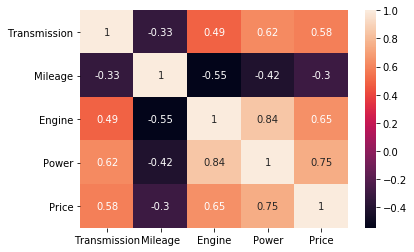

In [460]:
sns.heatmap(org_gas.corr(), annot = True)

In [461]:
formodel = org_gas.drop('Engine', axis = 1)

In [462]:
std_scale = preprocessing.StandardScaler().fit(formodel[['Mileage','Power']])
df_std = std_scale.transform(formodel[['Mileage','Power']])
                                      
l = formodel.shape[0]
k = 0
for i,j in df_std :
    formodel['Mileage'].iloc[k] = i
    formodel['Power'].iloc[k] = j
    k+=1
    if k == l :
        break                                      

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [463]:
X = formodel[['Transmission', 'Mileage', 'Power']]
y = formodel[['Price']]

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [465]:
rsquared= r2_score(y_test,y_predict)
score = mean_squared_error(y_test,y_predict)
print(rsquared)
print(score)

0.5904283033899749
44.36446038891744


In [466]:
org_natgas.Mileage = org_natgas.Mileage.str.strip(' km/kg')
org_natgas.Mileage = org_natgas.Mileage.str.replace('null','0').astype('float')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [467]:
org_natgas.drop('Fuel_Type',axis = 1, inplace = True)
print(org_natgas.corr())
org_natgas.drop('Transmission',axis = 1, inplace = True)


              Transmission   Mileage    Engine     Power     Price
Transmission           NaN       NaN       NaN       NaN       NaN
Mileage                NaN  1.000000 -0.602603 -0.387968 -0.165428
Engine                 NaN -0.602603  1.000000  0.814059  0.395858
Power                  NaN -0.387968  0.814059  1.000000  0.381982
Price                  NaN -0.165428  0.395858  0.381982  1.000000


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [468]:
std_scale = preprocessing.StandardScaler().fit(org_natgas[['Mileage','Power']])
df_std = std_scale.transform(org_natgas[['Mileage','Power']])
                                      
l = org_natgas.shape[0]
k = 0
for i,j in df_std :
    org_natgas['Mileage'].iloc[k] = i
    org_natgas['Power'].iloc[k] = j
    k+=1
    if k == l :
        break  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [469]:
X = org_natgas[['Mileage', 'Power']]
y = org_natgas[['Price']]

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
rsquared= r2_score(y_test,y_predict)
score = mean_squared_error(y_test,y_predict)
print(rsquared)
print(score)

-0.23627137411612087
1.3299053317203018


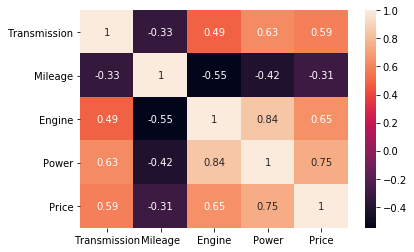

In [471]:
formodel = data[['Transmission','Mileage','Engine','Power','Price']]
sns.heatmap(formodel.corr(), annot = True)

In [472]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(formodel[['Engine','Power','Mileage']])
df_std = std_scale.transform(formodel[['Engine','Power','Mileage']])

In [473]:
l = formodel.shape[0]
k = 0
for i,j,m in df_std :
    formodel['Engine'].iloc[k] = i
    formodel['Power'].iloc[k] = j
    formodel['Mileage'].iloc[k] = m
    k+=1
    if k == l :
        break

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/ana

In [474]:
X = formodel[['Engine', 'Power','Transmission','Mileage']]
y = formodel[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

In [475]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
rsquared= r2_score(y_test,y_predict)
score = mean_squared_error(y_test,y_predict)
print(rsquared)
print(score)

0.6043361042918645
47.43178244061271


# Finally, removing the outliers and creating the model

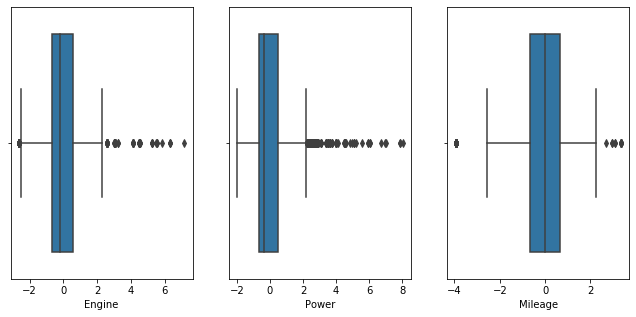

In [476]:
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
sns.boxplot(formodel.Engine)
plt.subplot(1,4,2)
sns.boxplot(formodel.Power)
plt.subplot(1,4,3)
sns.boxplot(formodel.Mileage)
plt.show()


In [477]:
q3 = formodel.Power.quantile(.75)
q1 = formodel.Power.quantile(.25)
iqr = q3-q1
uw = q3+1.5*iqr
index = formodel.loc[formodel.Power > uw].index

In [478]:
index.shape

(238,)

In [479]:
new = formodel.drop(index, axis = 0)

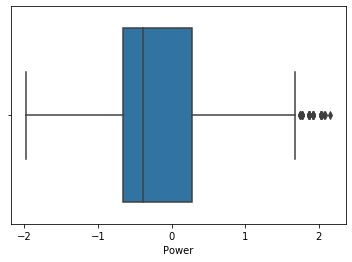

In [480]:
sns.boxplot(new.Power)

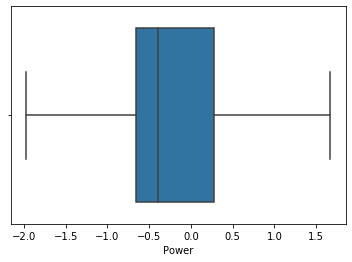

In [481]:
q3 = new.Power.quantile(.75)
q1 = new.Power.quantile(.25)
iqr = q3-q1
uw = q3+1.5*iqr
index = new.loc[new.Power > uw].index
new2 = new.drop(index, axis = 0)
sns.boxplot(new2.Power)
plt.show()


In [482]:
index.shape

(50,)

In [483]:
X = new2[['Power','Transmission','Mileage']]
y = new2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
rsquared = r2_score(y_test,y_predict)
score = mean_squared_error(y_test,y_predict)
print(rsquared)
print(score)

0.5194326539956577
26.790413819482392
